In [210]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

## make data

In [353]:
a = np.random.randn(1000,2)+np.random.random((1000,2))
a_lable = np.ones((1000,1))
b = np.random.randn(1000,2) +3+np.random.random((1000,2))
b_lable = np.zeros((1000,1))

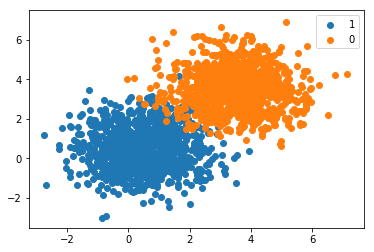

In [354]:
plt.scatter(a[:,0], a[:,1], label='1')
plt.scatter(b[:,0], b[:,1], label='0')
plt.legend()

In [355]:
X = np.vstack((a,b))
y = np.vstack((a_lable,b_lable))

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [357]:
X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

## simple model

epoch 0, loss 0.2706487774848938
epoch 50, loss 0.24832117557525635
epoch 100, loss 0.2353627234697342
epoch 150, loss 0.22371073067188263
epoch 200, loss 0.21226489543914795
epoch 250, loss 0.20087987184524536
epoch 300, loss 0.1896103322505951
epoch 350, loss 0.17856775224208832
epoch 400, loss 0.16788099706172943
epoch 450, loss 0.1576773077249527
epoch 500, loss 0.14806775748729706
epoch 550, loss 0.13913550972938538
epoch 600, loss 0.1309291273355484
epoch 650, loss 0.12346158176660538
epoch 700, loss 0.11671478301286697
epoch 750, loss 0.11064740270376205
epoch 800, loss 0.10520367324352264
epoch 850, loss 0.10032116621732712
epoch 900, loss 0.09593673795461655
epoch 950, loss 0.09199034422636032
epoch 1000, loss 0.08842720091342926
0.9227272727272727


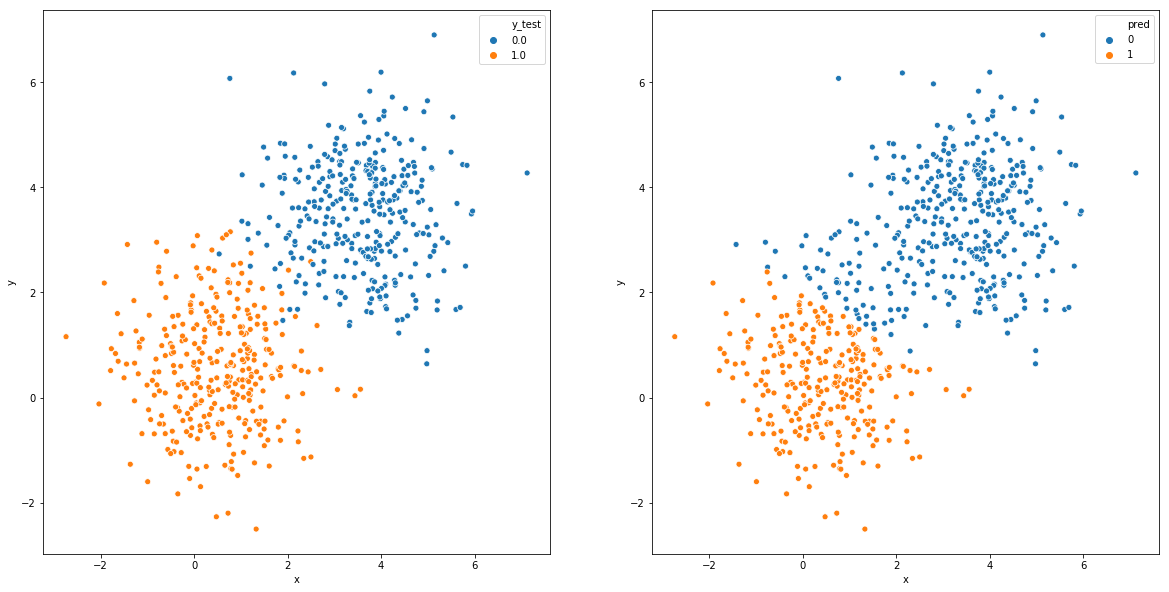

In [359]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=1), 
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
        
model = model.eval()
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
print((df.pred==df.y_test).mean())

epoch 0, loss 0.2801286280155182
epoch 50, loss 0.25194406509399414
epoch 100, loss 0.242853581905365
epoch 150, loss 0.23392663896083832
epoch 200, loss 0.22515513002872467
epoch 250, loss 0.2170080989599228
epoch 300, loss 0.20928286015987396
epoch 350, loss 0.2016809731721878
epoch 400, loss 0.19410830736160278
epoch 450, loss 0.1865268349647522
epoch 500, loss 0.17887432873249054
epoch 550, loss 0.17118968069553375
epoch 600, loss 0.16350892186164856
epoch 650, loss 0.15588343143463135
epoch 700, loss 0.14832277595996857
epoch 750, loss 0.14079801738262177
epoch 800, loss 0.13339850306510925
epoch 850, loss 0.12621326744556427
epoch 900, loss 0.11924970149993896
epoch 950, loss 0.11245599389076233
epoch 1000, loss 0.10590235888957977
0.9651515151515152


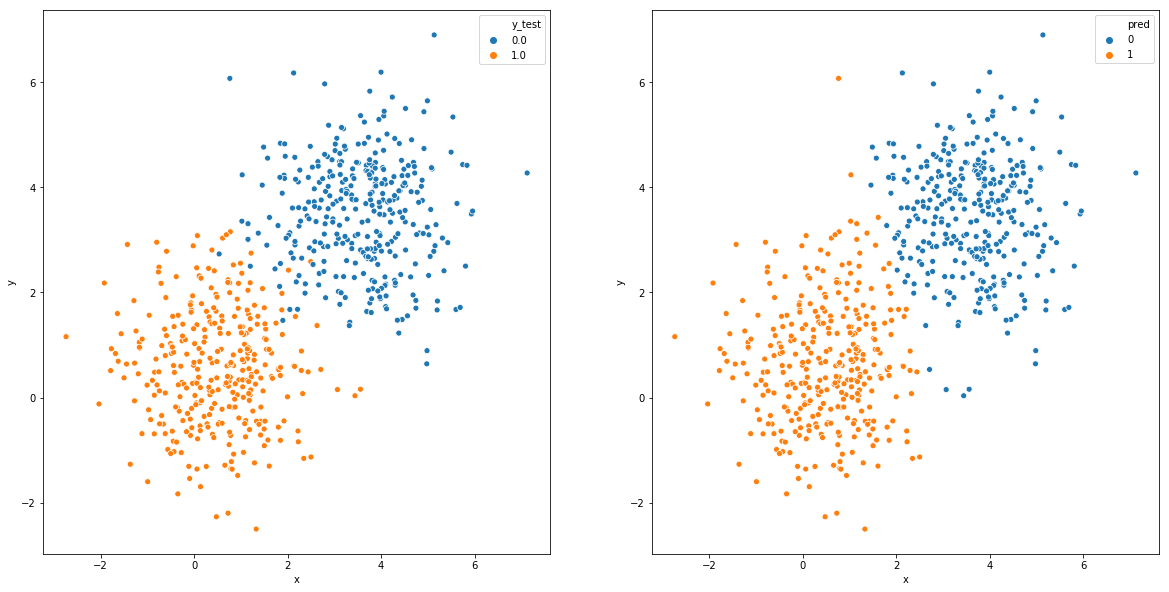

In [360]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=5),
                           nn.Linear(5,2),
                           nn.ReLU(),
                           nn.Linear(2,1),
                           nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
model = model.eval()
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0
        
df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
print((df.pred==df.y_test).mean())

epoch 0, loss 0.2594660222530365
epoch 50, loss 0.2564018666744232
epoch 100, loss 0.25411882996559143
epoch 150, loss 0.2523741126060486
epoch 200, loss 0.25144752860069275
epoch 250, loss 0.25055626034736633
epoch 300, loss 0.24898914992809296
epoch 350, loss 0.24869728088378906
epoch 400, loss 0.24692176282405853
epoch 450, loss 0.24574869871139526
epoch 500, loss 0.24437448382377625
epoch 550, loss 0.24244794249534607
epoch 600, loss 0.23799510300159454
epoch 650, loss 0.23593753576278687
epoch 700, loss 0.23127496242523193
epoch 750, loss 0.22575220465660095
epoch 800, loss 0.21510247886180878
epoch 850, loss 0.20592065155506134
epoch 900, loss 0.19491292536258698
epoch 950, loss 0.18667647242546082
epoch 1000, loss 0.17844469845294952
0.9590909090909091


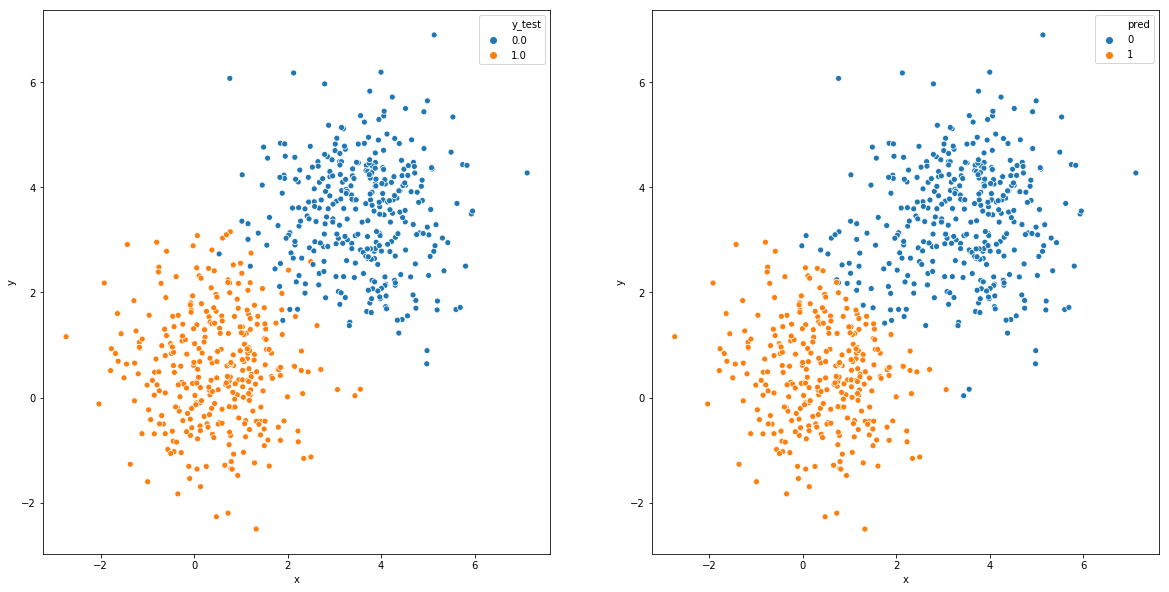

In [361]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

model = model.eval()
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0
df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
print((df.pred==df.y_test).mean())

## more deep model

epoch 0, loss 0.25026488304138184
epoch 200, loss 0.24991443753242493
epoch 400, loss 0.2468046098947525
epoch 600, loss 0.24108999967575073
epoch 800, loss 0.22599005699157715
epoch 1000, loss 0.20084190368652344
epoch 1200, loss 0.17488940060138702
epoch 1400, loss 0.14530357718467712
epoch 1600, loss 0.13011755049228668
epoch 1800, loss 0.10520745068788528
epoch 2000, loss 0.09783118963241577
0.9757575757575757


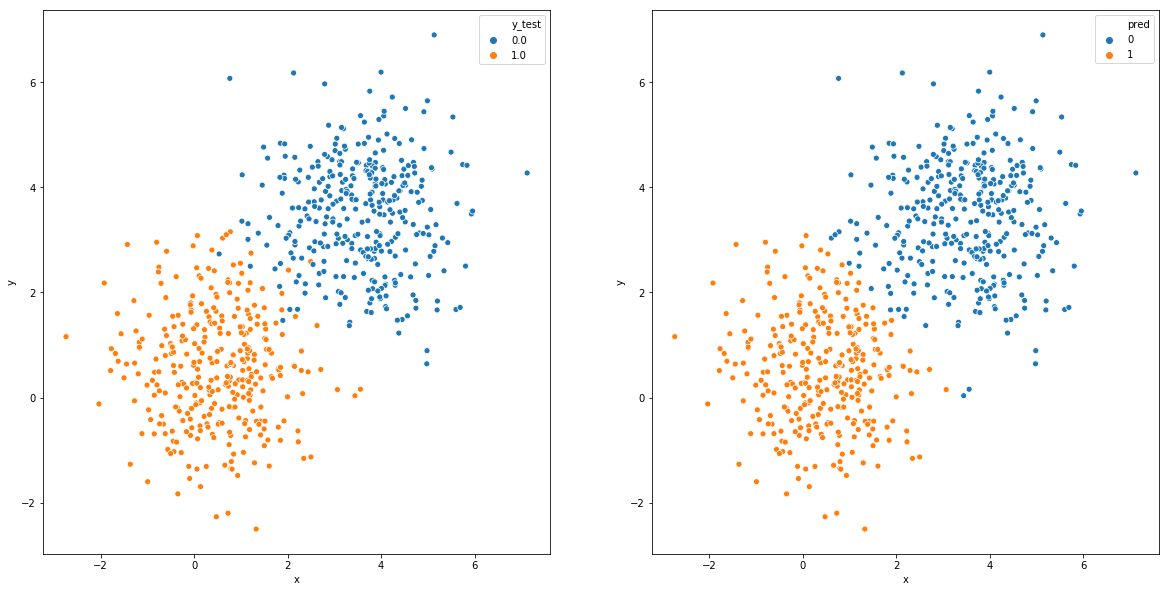

In [363]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
iteration_number = 2001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 200 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
model = model.eval()
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0
df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
print((df.pred==df.y_test).mean())

## cross validation

In [341]:
from sklearn.model_selection import  KFold

In [366]:
k = KFold(5, shuffle=True)

epoch 0, loss 0.2501164972782135
epoch 200, loss 0.24880282580852509
epoch 400, loss 0.24695459008216858
epoch 600, loss 0.24606476724147797
epoch 800, loss 0.24250979721546173
epoch 1000, loss 0.22529193758964539
epoch 1200, loss 0.19397544860839844
epoch 1400, loss 0.16866934299468994
epoch 1600, loss 0.1442299783229828
epoch 1800, loss 0.12397900968790054
epoch 2000, loss 0.1108100563287735


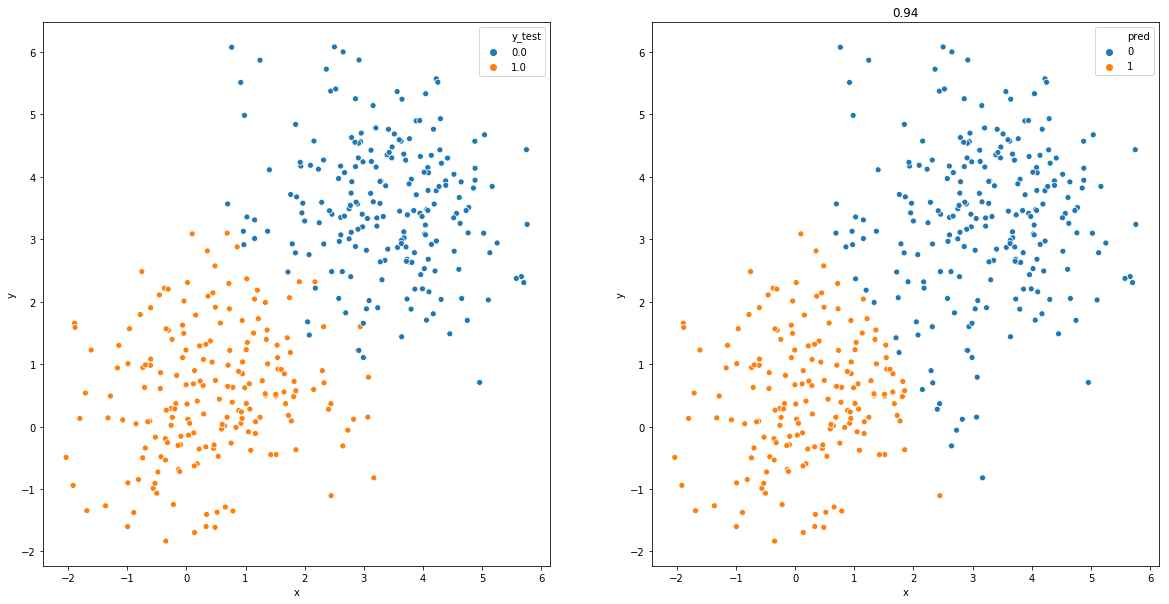

epoch 0, loss 0.24926503002643585
epoch 200, loss 0.24550682306289673
epoch 400, loss 0.23653210699558258
epoch 600, loss 0.21302790939807892
epoch 800, loss 0.19284328818321228
epoch 1000, loss 0.17514193058013916
epoch 1200, loss 0.1540573388338089
epoch 1400, loss 0.14158980548381805
epoch 1600, loss 0.13067150115966797
epoch 1800, loss 0.11926435679197311
epoch 2000, loss 0.10808034986257553


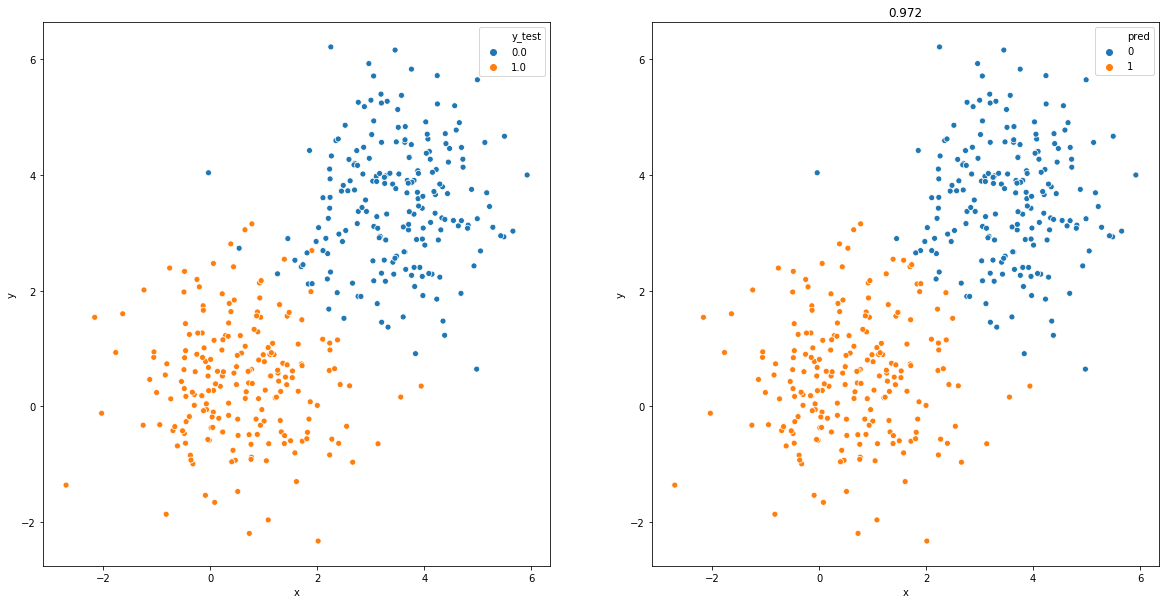

epoch 0, loss 0.2511483132839203
epoch 200, loss 0.24986733496189117
epoch 400, loss 0.24969688057899475
epoch 600, loss 0.24988098442554474
epoch 800, loss 0.24788200855255127
epoch 1000, loss 0.24831992387771606
epoch 1200, loss 0.247214213013649
epoch 1400, loss 0.24505239725112915
epoch 1600, loss 0.2371300458908081
epoch 1800, loss 0.21806588768959045
epoch 2000, loss 0.1834644228219986


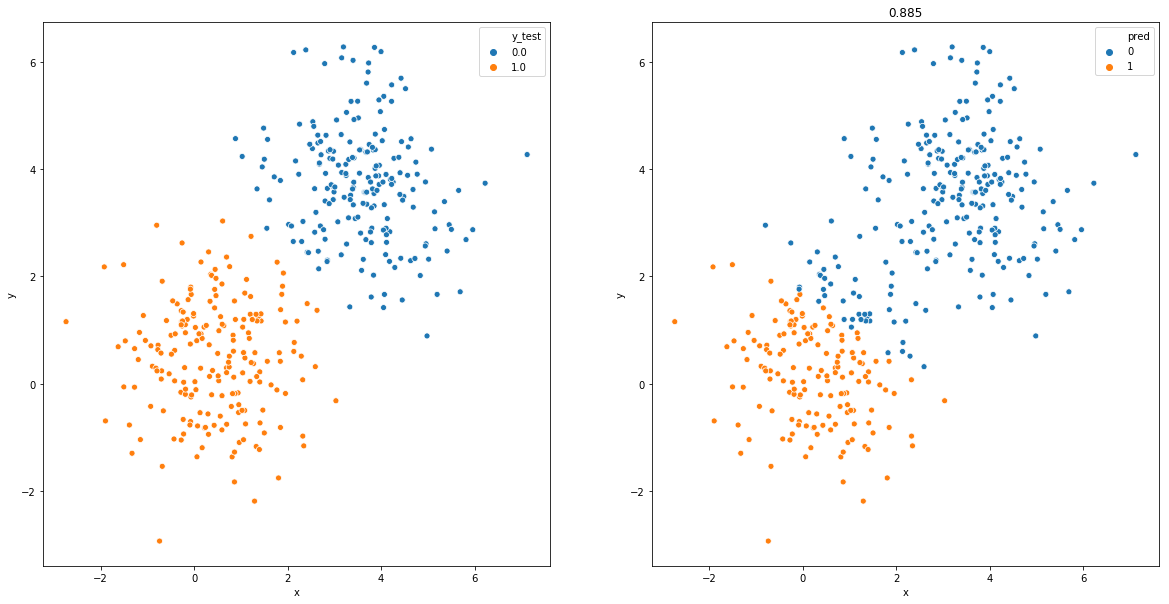

epoch 0, loss 0.25469720363616943
epoch 200, loss 0.25194352865219116
epoch 400, loss 0.25059112906455994
epoch 600, loss 0.25053179264068604
epoch 800, loss 0.249829962849617
epoch 1000, loss 0.24933581054210663
epoch 1200, loss 0.24845364689826965
epoch 1400, loss 0.2479313462972641
epoch 1600, loss 0.2465079426765442
epoch 1800, loss 0.24299639463424683
epoch 2000, loss 0.23364411294460297


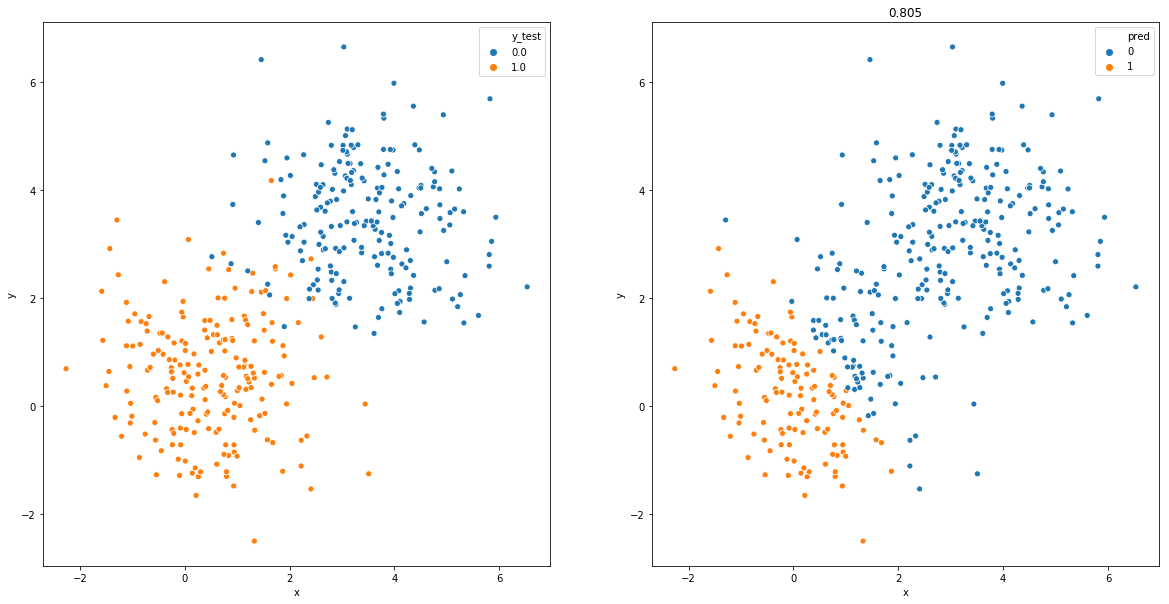

epoch 0, loss 0.2542162835597992
epoch 200, loss 0.24596191942691803
epoch 400, loss 0.2333407998085022
epoch 600, loss 0.2008751481771469
epoch 800, loss 0.15910638868808746
epoch 1000, loss 0.13684310019016266
epoch 1200, loss 0.11222010105848312
epoch 1400, loss 0.09605671465396881
epoch 1600, loss 0.09303870797157288
epoch 1800, loss 0.08535446971654892
epoch 2000, loss 0.08309514820575714


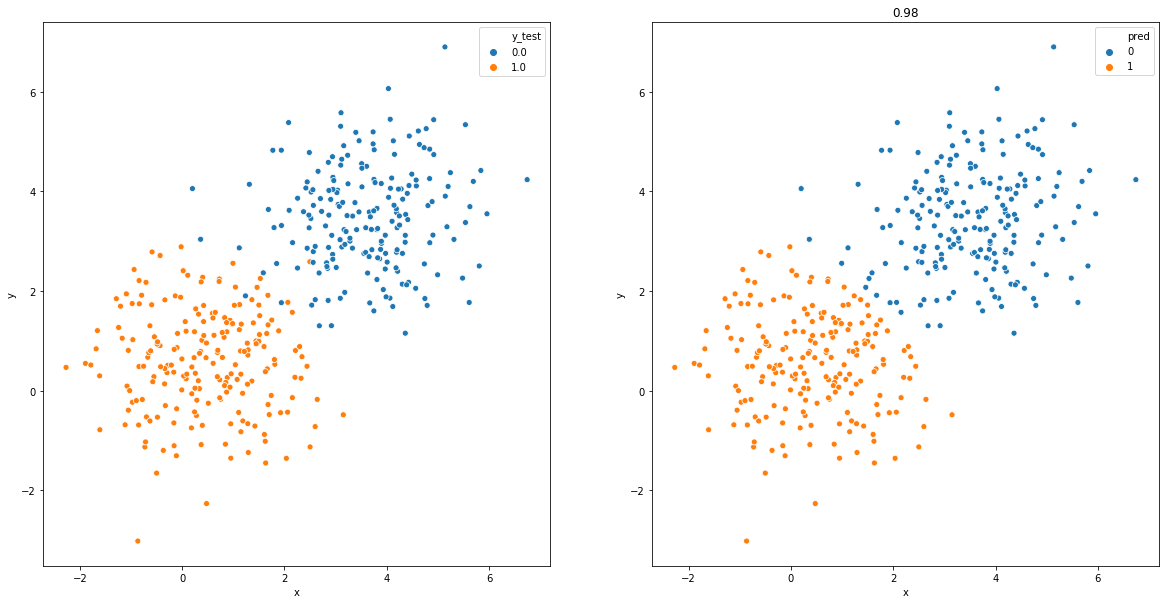

In [367]:
for trn_indx, val_indx in k.split(X):
    X_train = X[trn_indx,:]
    X_test = X[val_indx,:]
    y_train = y[trn_indx]
    y_test = y[val_indx]
    
    X_train = torch.from_numpy(X_train) .float() 
    X_test = torch.from_numpy(X_test) .float() 
    y_train = torch.from_numpy(y_train) .float() 
    y_test = torch.from_numpy(y_test) .float() 
    
    model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.Dropout(0.5),
                            nn.Linear(10,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 5),
                            nn.Dropout(0.5),
                            nn.Linear(5,10),
                            nn.ReLU(),
                            nn.Linear(10, 1),
                            nn.Sigmoid())
    model = model.train()

    mse = nn.MSELoss()
    learning_rate = 0.02  
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
    loss_list = []
    iteration_number = 2001
    for iteration in range(iteration_number):

        # optimization
        optimizer.zero_grad() 

        # Forward to get output
        results = model(X_train)
        # Calculate Loss
        loss = mse(results.squeeze(), y_train.squeeze())

        # backward propagation
        loss.backward()

        # Updating parameters
        optimizer.step()

        # store loss
        loss_list.append(loss.data)

        # print loss
        if(iteration % 200 == 0):
            print('epoch {}, loss {}'.format(iteration, loss.data))
            
    model = model.eval()
    pred = model(X_test).squeeze().tolist()
    for i, p in enumerate(pred):
        if p>0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.scatterplot(data=df, x='x', y='y', hue='y_test')
    plt.subplot(1,2,2)
    sns.scatterplot(data=df, x='x', y='y', hue='pred')
    plt.title(str((df.pred==df.y_test).mean())[:5])
    plt.show()